# Imports

In [ ]:
!pip install transformers sentencepiece

     тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 7.4/7.4 MB 52.6 MB/s eta 0:00:00
     тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 1.3/1.3 MB 84.7 MB/s eta 0:00:00
     тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 7.8/7.8 MB 122.0 MB/s eta 0:00:00
     тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 1.3/1.3 MB 57.9 MB/s eta 0:00:00


# Hugged login

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import XLMRobertaForSequenceClassification, AutoTokenizer
import torch

model_name = "Jayveersinh-Raj/Indo-Aryan-abuse-detection"
tokenizer = AutoTokenizer.from_pretrained("Jayveersinh-Raj/PolyGuard")
model = XLMRobertaForSequenceClassification.from_pretrained(model_name)

# Test data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/encoded_labels_hindi_tweets_test.csv")

In [ ]:
df

Sentences  encoded_labels
0    рдХреЗ рдЬрд░рд┐рдП рдХреЗрдиреНрджреНрд░ рд╕рд░рдХрд╛рд░ рджрд┐рд▓реНрд▓реА рдХреЗ рд╡рд┐рдХрд╛рд╕ рдореЗрдВ рд░реЛрдбрд╝...               0
1    рдмреАрдЬреЗрдкреА рдХреЛ рддреЛ рдХрднреА рдореБрд╕рд▓рдорд╛рдиреЛ рдиреЗ рдЕрдкрдирд╛ рдорд╛рдирд╛ рдирд╣реАрдХреНрдпрд╛...               0
2    рдмреА рдЬреЗ рдкреА рд╕рд░рдХрд╛рд░ рдореЗ рд╢рд┐рдХреНрд╖рд╛ рдорд┐рддреНрд░реЛ рдХреА рджреБрд░реНрдЧрддрд┐ рд╣реЛ ...               0
3    рдЕрдм рд▓рдбрд╝рд╛рдИ рдХреЙрдВрдЧреНрд░реЗрд╕ рдФрд░ рдмреАрдЬреЗрдкреА рдореЗрдВ рдирд╣реАрдВ рд░рд╣реА  рдЕрдм рд▓...               0
4    рд░рд╛рдЬрд╕реНрдерд╛рди рдЙрдкрдЪреБрдирд╛рд╡ рдирддреАрдЬреЗ  рд░рд╛рдЬрд╕реНрдерд╛рди рдореЗрдВ рдХрд╛рдВрдЧреНрд░реЗрд╕ ...               0
..                                                 ...             ...
392  рджреЛрд╕реНрддреЛрдВ рдореИрдВ рдЬрд╛рдирддреА рд╣реВрдБ рдХреА рдЗрд╕ рд╕рдордп рдЖрдкрдХрд╛ рд╣рд╛рде рдЖрдкрдХреЗ ...               1
393  рдХреБрддреЗ рд╡рдлрд╛рджрд╛рд░ рд╣реЛрддреЗ рд╣реИрдВ рдкрд░ рддреБрдо рдЬреИрд╕реЗ рд╕реБрдЕрд░ рдирд╣реА рд╣реЛрддреЗ...               1
394  рднреЗрдВрдЪреЛ рдЬреАрдЬрд╛ рдЕрдкрдиреЗ рд▓рдгреНрдб рдкрд░ рдХреНрд░рд╛рдВрддрд┐ рд▓рд┐рдЦрдиреЗ рдореЗрдВ рдмрд┐рдЬреА...               1
395    рдЖрдЬ рдкрдкреНрдкреВ рдФрд░ рдЪреЛрджреВ рджреЛрдиреЛрдВ рд╕рд╛рде рд╕рд╛рде рд╣реЛрдВрдЧреЗ рдорддрд▓рдм\t  \n               1
396        рдЬреЛ рдЧрд╛рдБрдб рд╕реЗ рд╕реБрдИ рдореЗрдВ рдзрд╛рдЧрд╛ рдкрд┐рд░реЛ рджреЗ рд╡реЛ рд░рд╛рдЬрдкреВрдд\n               1

[397 rows x 2 columns]

In [ ]:
import torch
import time

# Define the device (GPU or CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Move the model to the appropriate device
model = model.to(device)

# Initialize an empty list to store the predictions
predictions = []

# Define the batch size and total time variables
batch_size = 100
total_time = 0.0

# Split the dataframe into batches
for i in range(0, len(df), batch_size):
    batch_texts = df['Sentences'].iloc[i:i+batch_size].tolist()

    # Tokenize the batch of texts and move to the device
    inputs = tokenizer.batch_encode_plus(batch_texts, return_tensors="pt", max_length=512, truncation=True, padding=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Perform the model inference on the batch
    with torch.no_grad():  # Disable gradient calculation during inference
        start_time = time.time()  # Start time for the batch
        outputs = model(**inputs)
        probabilities = torch.softmax(outputs.logits, dim=1)
        predicted_classes = torch.argmax(probabilities, dim=1)
        end_time = time.time()  # End time for the batch

    # Calculate the time taken for the batch
    batch_time = end_time - start_time

    # Map predicted class indices to labels
    batch_pred_labels = [1 if pred == 1 else 0 for pred in predicted_classes.tolist()]

    # Extend the predictions list with batch results
    predictions.extend(batch_pred_labels)

    # Accumulate batch time to the total time
    total_time += batch_time

    # Clear variables and tensors that are not required
    del inputs, outputs, probabilities, predicted_classes, batch_texts, batch_pred_labels
    torch.cuda.empty_cache()  # Clear GPU cache if applicable

    # Print time taken for the current batch
    print(f"Batch {i//batch_size+1}: {batch_time:.4f} seconds")

# Assign the predictions to the dataframe
df['pred_lab'] = predictions

# Print total time taken for processing the entire data
print(f"Total time taken for the entire data: {total_time:.4f} seconds")

Batch 1: 0.7837 seconds
Batch 2: 0.0220 seconds
Batch 3: 0.0249 seconds
Batch 4: 0.0128 seconds
Total time taken for the entire data: 0.8434 seconds


In [ ]:
df

Sentences  encoded_labels  \
0    рдХреЗ рдЬрд░рд┐рдП рдХреЗрдиреНрджреНрд░ рд╕рд░рдХрд╛рд░ рджрд┐рд▓реНрд▓реА рдХреЗ рд╡рд┐рдХрд╛рд╕ рдореЗрдВ рд░реЛрдбрд╝...               0   
1    рдмреАрдЬреЗрдкреА рдХреЛ рддреЛ рдХрднреА рдореБрд╕рд▓рдорд╛рдиреЛ рдиреЗ рдЕрдкрдирд╛ рдорд╛рдирд╛ рдирд╣реАрдХреНрдпрд╛...               0   
2    рдмреА рдЬреЗ рдкреА рд╕рд░рдХрд╛рд░ рдореЗ рд╢рд┐рдХреНрд╖рд╛ рдорд┐рддреНрд░реЛ рдХреА рджреБрд░реНрдЧрддрд┐ рд╣реЛ ...               0   
3    рдЕрдм рд▓рдбрд╝рд╛рдИ рдХреЙрдВрдЧреНрд░реЗрд╕ рдФрд░ рдмреАрдЬреЗрдкреА рдореЗрдВ рдирд╣реАрдВ рд░рд╣реА  рдЕрдм рд▓...               0   
4    рд░рд╛рдЬрд╕реНрдерд╛рди рдЙрдкрдЪреБрдирд╛рд╡ рдирддреАрдЬреЗ  рд░рд╛рдЬрд╕реНрдерд╛рди рдореЗрдВ рдХрд╛рдВрдЧреНрд░реЗрд╕ ...               0   
..                                                 ...             ...   
392  рджреЛрд╕реНрддреЛрдВ рдореИрдВ рдЬрд╛рдирддреА рд╣реВрдБ рдХреА рдЗрд╕ рд╕рдордп рдЖрдкрдХрд╛ рд╣рд╛рде рдЖрдкрдХреЗ ...               1   
393  рдХреБрддреЗ рд╡рдлрд╛рджрд╛рд░ рд╣реЛрддреЗ рд╣реИрдВ рдкрд░ рддреБрдо рдЬреИрд╕реЗ рд╕реБрдЕрд░ рдирд╣реА рд╣реЛрддреЗ...               1   
394  рднреЗрдВрдЪреЛ рдЬреАрдЬрд╛ рдЕрдкрдиреЗ рд▓рдгреНрдб рдкрд░ рдХреНрд░рд╛рдВрддрд┐ рд▓рд┐рдЦрдиреЗ рдореЗрдВ рдмрд┐рдЬреА...               1   
395    рдЖрдЬ рдкрдкреНрдкреВ рдФрд░ рдЪреЛрджреВ рджреЛрдиреЛрдВ рд╕рд╛рде рд╕рд╛рде рд╣реЛрдВрдЧреЗ рдорддрд▓рдм\t  \n               1   
396        рдЬреЛ рдЧрд╛рдБрдб рд╕реЗ рд╕реБрдИ рдореЗрдВ рдзрд╛рдЧрд╛ рдкрд┐рд░реЛ рджреЗ рд╡реЛ рд░рд╛рдЬрдкреВрдд\n               1   

     pred_lab  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
392         1  
393         1  
394         1  
395         1  
396         1  

[397 rows x 3 columns]

# Evaluation

In [ ]:
from helper_utils import *

# Confusion matrix

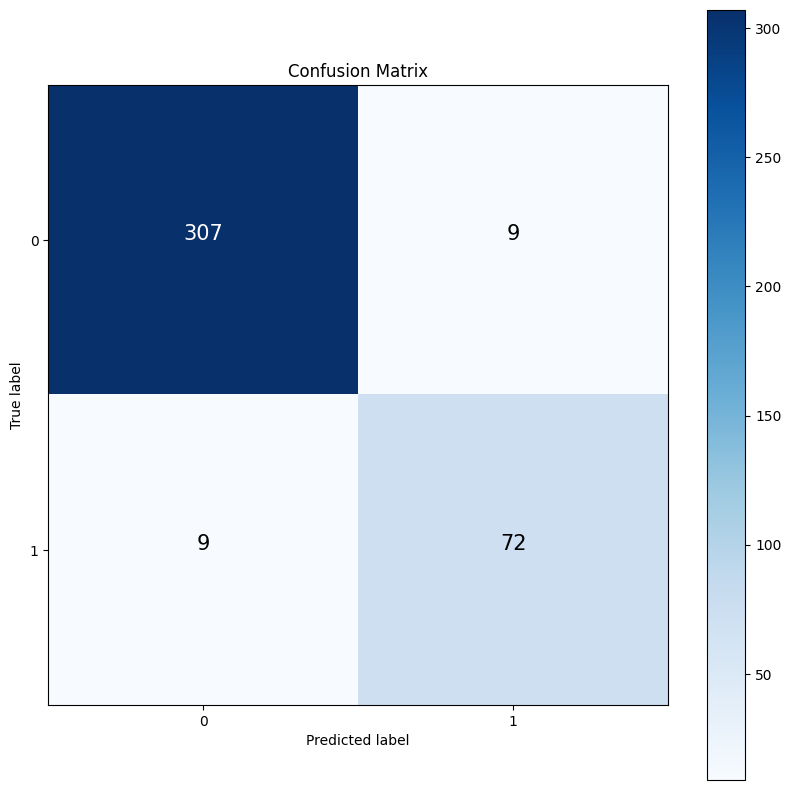

In [ ]:
make_confusion_matrix(y_true = df['encoded_labels'], y_pred = df['pred_lab'])

# Top-1 accuracy

In [ ]:
top_1_accuracy(y_true = df['encoded_labels'], y_pred = df['pred_lab'])

0.9546599496221663

# Precision, Recall, F1

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

precision = precision_score(df['encoded_labels'], df['pred_lab'])
recall = recall_score(df['encoded_labels'], df['pred_lab'])
f1score = f1_score(df['encoded_labels'], df['pred_lab'])

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8888888888888888
Recall = 0.8888888888888888
F1 Score = 0.8888888888888888


# Evaluation on Gujarati set

In [11]:
guj_df = pd.read_csv("/content/GujaratiTrainingData.csv")

In [13]:
guj = pd.DataFrame()
guj['tweets'] = guj_df["text"]
guj["labels"] = guj_df["label"]

In [14]:
guj

tweets labels
0    @username @username ркЗ рк╡рк╛ркпркбрк╛ркИ ркирк╛ ркдрлБркВ рк╣рк╛ркИрк╕ ркбрлЛркмрлЛ ...    HOF
1    @username @username ркЖрк╡рк╛ рк╣рк▓ркХрк╛ ркХрлЗркЯрк▓рк╛ ркЫрлЗ ркХрк╛ркп ркЦркмрк░ ...    HOF
2    @username @username ркдрк╛рк░рлА ркЬрлЗрко ркЕркорлЗ ркЬрлНркЮрк╛ркдрк┐ ркорк╛ркВ ркмркЯ...    HOF
3    @username ркЖрк╡рлБркВ рк╡рк╛рк╣рк┐ркпрк╛ркд ркЦрк╛рк╡рк╛ рк╡рк╛рк│рк╛ рк▓рлЛркХрлЛ рккркг ркЫрлЗ ЁЯШИЁЯШИ...    NOT
4    @username @username ркмрлЗрк╢ркХ, рк╣рлБркВ ркдркоркирлЗ ркорлВрк░рлНркЦ ркХрк╣рлА рк╢...    NOT
..                                                 ...    ...
195  @username ркЖркЬ рк╡рк┐ркжрлЗрк╢рлА рккрлНрк░рк┐ркирлНркЯ ркорлАркбрк┐ркпрк╛ ркорк╛ркВ рк░рк╛рк╣рлБрк▓ ркЧ...    NOT
196  @username @username @username ркнркбрк╡рлЛ ркиркпрки ркЪрк╛ркжрк░ ркорлЛ...    HOF
197  @username ркЪрлЛркжрлАркирк╛ ркдрк╛рк░рк╛ ркЬрлЗрк╡рк╛ ркирлЗ рккрк╛ркХрк┐рк╕рлНркдрк╛рки ркнрлЗркЧрлА рки...    HOF
198  @username @username @username @username @usern...    NOT
199  рккрк╛рк░ркХрлА рккркВркЪрк╛ркд : ркирлАркдрк┐рки рккркЯрлЗрк▓ркирлЗ ркХрлЗрко ркЙркбрлА ркЧркпрлЛ ркЫрлЗ рк░рк╕? ...    NOT

[200 rows x 2 columns]

# Labels mappings

In [15]:
mappings = {'HOF': 1, 'NOT': 0}

In [18]:
encoded_list = []
for rows in guj["labels"].items():
  encoded_list.append(mappings[rows[1]])

# Adding encodings to the data

In [20]:
guj["encoded_labels"] = encoded_list

In [21]:
guj

tweets labels  encoded_labels
0    @username @username ркЗ рк╡рк╛ркпркбрк╛ркИ ркирк╛ ркдрлБркВ рк╣рк╛ркИрк╕ ркбрлЛркмрлЛ ...    HOF               1
1    @username @username ркЖрк╡рк╛ рк╣рк▓ркХрк╛ ркХрлЗркЯрк▓рк╛ ркЫрлЗ ркХрк╛ркп ркЦркмрк░ ...    HOF               1
2    @username @username ркдрк╛рк░рлА ркЬрлЗрко ркЕркорлЗ ркЬрлНркЮрк╛ркдрк┐ ркорк╛ркВ ркмркЯ...    HOF               1
3    @username ркЖрк╡рлБркВ рк╡рк╛рк╣рк┐ркпрк╛ркд ркЦрк╛рк╡рк╛ рк╡рк╛рк│рк╛ рк▓рлЛркХрлЛ рккркг ркЫрлЗ ЁЯШИЁЯШИ...    NOT               0
4    @username @username ркмрлЗрк╢ркХ, рк╣рлБркВ ркдркоркирлЗ ркорлВрк░рлНркЦ ркХрк╣рлА рк╢...    NOT               0
..                                                 ...    ...             ...
195  @username ркЖркЬ рк╡рк┐ркжрлЗрк╢рлА рккрлНрк░рк┐ркирлНркЯ ркорлАркбрк┐ркпрк╛ ркорк╛ркВ рк░рк╛рк╣рлБрк▓ ркЧ...    NOT               0
196  @username @username @username ркнркбрк╡рлЛ ркиркпрки ркЪрк╛ркжрк░ ркорлЛ...    HOF               1
197  @username ркЪрлЛркжрлАркирк╛ ркдрк╛рк░рк╛ ркЬрлЗрк╡рк╛ ркирлЗ рккрк╛ркХрк┐рк╕рлНркдрк╛рки ркнрлЗркЧрлА рки...    HOF               1
198  @username @username @username @username @usern...    NOT               0
199  рккрк╛рк░ркХрлА рккркВркЪрк╛ркд : ркирлАркдрк┐рки рккркЯрлЗрк▓ркирлЗ ркХрлЗрко ркЙркбрлА ркЧркпрлЛ ркЫрлЗ рк░рк╕? ...    NOT               0

[200 rows x 3 columns]

In [22]:
guj.to_csv("gujarati_tweets_encoded.csv", index = False)

In [23]:
view = pd.read_csv("/content/gujarati_tweets_encoded.csv")

In [24]:
view

tweets labels  encoded_labels
0    @username @username ркЗ рк╡рк╛ркпркбрк╛ркИ ркирк╛ ркдрлБркВ рк╣рк╛ркИрк╕ ркбрлЛркмрлЛ ...    HOF               1
1    @username @username ркЖрк╡рк╛ рк╣рк▓ркХрк╛ ркХрлЗркЯрк▓рк╛ ркЫрлЗ ркХрк╛ркп ркЦркмрк░ ...    HOF               1
2    @username @username ркдрк╛рк░рлА ркЬрлЗрко ркЕркорлЗ ркЬрлНркЮрк╛ркдрк┐ ркорк╛ркВ ркмркЯ...    HOF               1
3    @username ркЖрк╡рлБркВ рк╡рк╛рк╣рк┐ркпрк╛ркд ркЦрк╛рк╡рк╛ рк╡рк╛рк│рк╛ рк▓рлЛркХрлЛ рккркг ркЫрлЗ ЁЯШИЁЯШИ...    NOT               0
4    @username @username ркмрлЗрк╢ркХ, рк╣рлБркВ ркдркоркирлЗ ркорлВрк░рлНркЦ ркХрк╣рлА рк╢...    NOT               0
..                                                 ...    ...             ...
195  @username ркЖркЬ рк╡рк┐ркжрлЗрк╢рлА рккрлНрк░рк┐ркирлНркЯ ркорлАркбрк┐ркпрк╛ ркорк╛ркВ рк░рк╛рк╣рлБрк▓ ркЧ...    NOT               0
196  @username @username @username ркнркбрк╡рлЛ ркиркпрки ркЪрк╛ркжрк░ ркорлЛ...    HOF               1
197  @username ркЪрлЛркжрлАркирк╛ ркдрк╛рк░рк╛ ркЬрлЗрк╡рк╛ ркирлЗ рккрк╛ркХрк┐рк╕рлНркдрк╛рки ркнрлЗркЧрлА рки...    HOF               1
198  @username @username @username @username @usern...    NOT               0
199  рккрк╛рк░ркХрлА рккркВркЪрк╛ркд : ркирлАркдрк┐рки рккркЯрлЗрк▓ркирлЗ ркХрлЗрко ркЙркбрлА ркЧркпрлЛ ркЫрлЗ рк░рк╕? ...    NOT               0

[200 rows x 3 columns]

# Evaluation

In [28]:
import torch
import time

def infer(df: pd.DataFrame, column: str, model, tokenizer) -> None:
  # Define the device (GPU or CPU)
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

  # Move the model to the appropriate device
  model = model.to(device)

  # Initialize an empty list to store the predictions
  predictions = []

  # Define the batch size and total time variables
  batch_size = 100
  total_time = 0.0

  # Split the dataframe into batches
  for i in range(0, len(df), batch_size):
      batch_texts = df[column].iloc[i:i+batch_size].tolist()

      # Tokenize the batch of texts and move to the device
      inputs = tokenizer.batch_encode_plus(batch_texts, return_tensors="pt", max_length=512, truncation=True, padding=True)
      inputs = {key: val.to(device) for key, val in inputs.items()}

      # Perform the model inference on the batch
      with torch.no_grad():  # Disable gradient calculation during inference
          start_time = time.time()  # Start time for the batch
          outputs = model(**inputs)
          probabilities = torch.softmax(outputs.logits, dim=1)
          predicted_classes = torch.argmax(probabilities, dim=1)
          end_time = time.time()  # End time for the batch

      # Calculate the time taken for the batch
      batch_time = end_time - start_time

      # Map predicted class indices to labels
      batch_pred_labels = [1 if pred == 1 else 0 for pred in predicted_classes.tolist()]

      # Extend the predictions list with batch results
      predictions.extend(batch_pred_labels)

      # Accumulate batch time to the total time
      total_time += batch_time

      # Clear variables and tensors that are not required
      del inputs, outputs, probabilities, predicted_classes, batch_texts, batch_pred_labels
      torch.cuda.empty_cache()  # Clear GPU cache if applicable

      # Print time taken for the current batch
      print(f"Batch {i//batch_size+1}: {batch_time:.4f} seconds")

  # Assign the predictions to the dataframe
  df['pred_lab'] = predictions

  # Print total time taken for processing the entire data
  print(f"Total time taken for the entire data: {total_time:.4f} seconds")

In [30]:
infer(df = guj, column = 'tweets', model = model, tokenizer = tokenizer)

Batch 1: 0.0249 seconds
Batch 2: 0.0226 seconds
Total time taken for the entire data: 0.0474 seconds


In [31]:
guj

tweets labels  encoded_labels  \
0    @username @username ркЗ рк╡рк╛ркпркбрк╛ркИ ркирк╛ ркдрлБркВ рк╣рк╛ркИрк╕ ркбрлЛркмрлЛ ...    HOF               1   
1    @username @username ркЖрк╡рк╛ рк╣рк▓ркХрк╛ ркХрлЗркЯрк▓рк╛ ркЫрлЗ ркХрк╛ркп ркЦркмрк░ ...    HOF               1   
2    @username @username ркдрк╛рк░рлА ркЬрлЗрко ркЕркорлЗ ркЬрлНркЮрк╛ркдрк┐ ркорк╛ркВ ркмркЯ...    HOF               1   
3    @username ркЖрк╡рлБркВ рк╡рк╛рк╣рк┐ркпрк╛ркд ркЦрк╛рк╡рк╛ рк╡рк╛рк│рк╛ рк▓рлЛркХрлЛ рккркг ркЫрлЗ ЁЯШИЁЯШИ...    NOT               0   
4    @username @username ркмрлЗрк╢ркХ, рк╣рлБркВ ркдркоркирлЗ ркорлВрк░рлНркЦ ркХрк╣рлА рк╢...    NOT               0   
..                                                 ...    ...             ...   
195  @username ркЖркЬ рк╡рк┐ркжрлЗрк╢рлА рккрлНрк░рк┐ркирлНркЯ ркорлАркбрк┐ркпрк╛ ркорк╛ркВ рк░рк╛рк╣рлБрк▓ ркЧ...    NOT               0   
196  @username @username @username ркнркбрк╡рлЛ ркиркпрки ркЪрк╛ркжрк░ ркорлЛ...    HOF               1   
197  @username ркЪрлЛркжрлАркирк╛ ркдрк╛рк░рк╛ ркЬрлЗрк╡рк╛ ркирлЗ рккрк╛ркХрк┐рк╕рлНркдрк╛рки ркнрлЗркЧрлА рки...    HOF               1   
198  @username @username @username @username @usern...    NOT               0   
199  рккрк╛рк░ркХрлА рккркВркЪрк╛ркд : ркирлАркдрк┐рки рккркЯрлЗрк▓ркирлЗ ркХрлЗрко ркЙркбрлА ркЧркпрлЛ ркЫрлЗ рк░рк╕? ...    NOT               0   

     pred_lab  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
195         0  
196         1  
197         1  
198         0  
199         0  

[200 rows x 4 columns]

In [37]:
guj.iloc[1]['tweets']

'@username @username ркЖрк╡рк╛ рк╣рк▓ркХрк╛ ркХрлЗркЯрк▓рк╛ ркЫрлЗ ркХрк╛ркп ркЦркмрк░ ркиркерлА рккркбркдрлА\nркЖрк╡рк╛ рк╣рк▓ркХрк╛ рк╡рк┐рк░рлЛркз ркХрк░рк╡рк╛ рк╕рк┐рк╡рк╛ркп ркмрлАркЬрлЛ ркзркВркзрлЛ ркЬ рк╕рлБ ркЫрлЗ \nркЬрлЗркирлЗ ркмрлЛрк▓рк╛рк╡рлЗ ркдрлЗркирлЗ ркПркорк╛ ркдрк╛рк░рк╛ ркмрк╛рккрк╛ ркирлБркВ рк╕рлБ ркЬрк╛ркп ркЫрлЗ рк╣рк▓ркХрк╛ \nркЫрк╛ркирлЛркорк╛ркирлЛ ркдрк╛рк░рлБркВ ркХрк╛рко ркХрк░ ркирлЗ рк╣рк▓ркХрк╛ рк╣рк╛ ркдрлНрк░рлЗрк╡ркб ркиркерлА ркирлЗ рк╕рк▓рк╛рк╣ ркжрлЗрк╡рк╛ ркЖрк╡рлА ркЧркпрлЛ ркЫрлЗ рк╣рк▓ркХрлЛ\nркнрк╛ркЧ рк╣рк▓ркХрк╛ ркнрк╛ркЧ'

# Evaluation

## Confusion Matrix

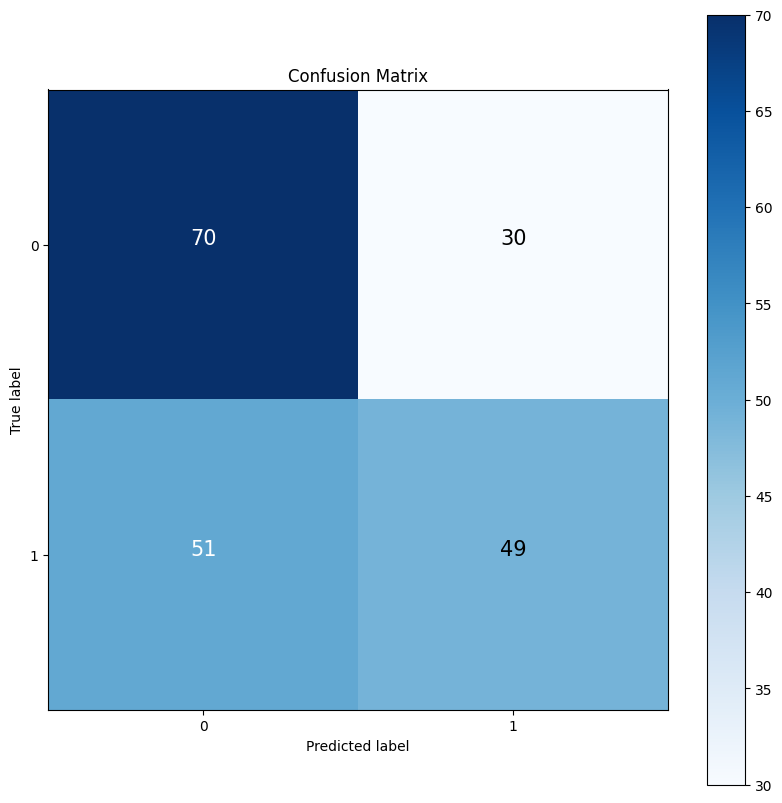

In [33]:
make_confusion_matrix(y_true = guj['encoded_labels'], y_pred = guj['pred_lab'])

# Top-1 accuracy

In [34]:
top_1_accuracy(y_true = guj['encoded_labels'], y_pred = guj['pred_lab'])

0.595

In [35]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

precision = precision_score(guj['encoded_labels'], guj['pred_lab'])
recall = recall_score(guj['encoded_labels'], guj['pred_lab'])
f1score = f1_score(guj['encoded_labels'], guj['pred_lab'])

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.620253164556962
Recall = 0.49
F1 Score = 0.547486033519553
